This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.8174472]
 [ 1.4840615]
 [ 1.1667522]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.01529825]
 [0.21628952]
 [0.88558376]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-2.7314246 ],
       [-0.29633927],
       [-0.00324623]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [10]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [11]:
import tensorflow as tf

# Create a TensorFlow variable with an initial value of 3.0
input_var = tf.Variable(initial_value=3.0)

# Open a GradientTape context to record operations for automatic differentiation
with tf.GradientTape() as tape:
    # Compute the square of input_var (result = input_var^2)
    result = tf.square(input_var)

'''Compute the gradient of `result` with respect to `input_var`
The GradientTape context records the operations performed within it
So we can use it to compute the gradient of the result with respect to input_var'''
gradient = tape.gradient(result, input_var)

# Print the result and the computed gradient
print(f"Result: {result.numpy()}, Gradient: {gradient.numpy()}")


Result: 9.0, Gradient: 6.0


**Using `GradientTape` with constant tensor inputs**

In [12]:
# Create a TensorFlow constant with a value of 3.0
input_const = tf.constant(3.0)

# Open a GradientTape context to record operations for automatic differentiation
with tf.GradientTape() as tape:
    # Manually instruct the GradientTape to watch the constant input_const
    tape.watch(input_const)

    # Compute the square of input_const (result = input_const^2)
    result = tf.square(input_const)

'''Compute the gradient of `result` with respect to `input_const`
The GradientTape context records the operations performed within it
So we can use it to compute the gradient of the result with respect to input_const'''
gradient = tape.gradient(result, input_const)

# Print the result and the computed gradient
print(f"Result: {result.numpy()}, Gradient: {gradient.numpy()}")

Result: 9.0, Gradient: 6.0


**Using nested gradient tapes to compute second-order gradients**

In [13]:
# Create a TensorFlow variable with an initial value of 0.0
time = tf.Variable(0.0)

# Open an outer GradientTape context to record operations for second-order differentiation
with tf.GradientTape() as outer_tape:
    # Open an inner GradientTape context to record operations for first-order differentiation
    with tf.GradientTape() as inner_tape:
        # Compute the position based on the equation of motion for free fall under gravity
        # position = 4.9 * time^2 (assuming g = 9.8 m/s^2, and 4.9 is half of g)
        position =  4.9 * time ** 2

    # Compute the gradient of `position` with respect to `time` (i.e., speed)
    speed = inner_tape.gradient(position, time)

# Compute the gradient of `speed` with respect to `time` (i.e., acceleration)
acceleration = outer_tape.gradient(speed, time)

# Print the computed speed and acceleration
print(f"Speed: {speed.numpy()}, Acceleration: {acceleration.numpy()}")

Speed: 0.0, Acceleration: 9.800000190734863


#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [14]:
# Define the number of samples to generate for each class
num_samples_per_class = 1000

# Generate negative samples from a multivariate normal distribution
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],         # Mean of the distribution for negative samples
    cov=[[1, 0.5],       # Covariance matrix for negative samples
         [0.5, 1]],
    size=num_samples_per_class)  # Number of samples to generate

# Generate positive samples from a multivariate normal distribution
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],         # Mean of the distribution for positive samples
    cov=[[1, 0.5],       # Covariance matrix for positive samples
         [0.5, 1]],
    size=num_samples_per_class)  # Number of samples to generate

**Stacking the two classes into an array with shape (2000, 2)**

In [15]:
'''Stack the negative and positive samples vertically. This combines the two sets of samples into a single array.
Convert the combined array to float32 data type'''

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [16]:
'''Now, targets is a 2D NumPy array with shape (2 * num_samples_per_class, 1)
The first num_samples_per_class rows are 0 (negative class)
The next num_samples_per_class rows are 1 (positive class)'''

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

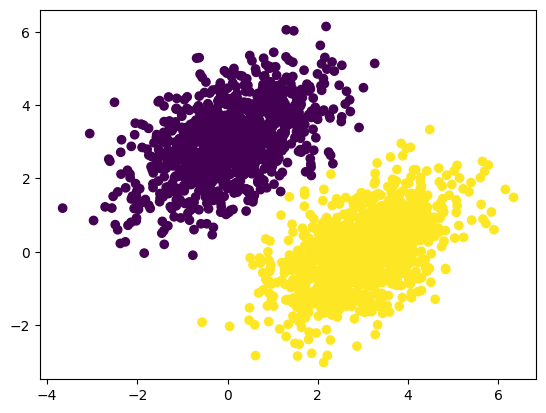

In [17]:
import matplotlib.pyplot as plt

'''Scatter plot of inputs, where inputs[:, 0] represents the x-axis values and inputs[:, 1] represents the y-axis values
c=targets[:, 0] assigns colors to the points based on the target labels (0 or 1)'''
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

# Show the plot
plt.show()


**Creating the linear classifier variables**

In [18]:
# Define the dimensions for input and output layers
input_dim = 2
output_dim = 1

# Initialize weights (W) using random uniform distribution
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))

# Initialize biases (b) with zeros
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


**The forward pass function**

In [19]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [20]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [21]:
# Learning rate for gradient descent optimization
learning_rate = 0.1

# Define the training step function
def training_step(inputs, targets):
    # Use a gradient tape to record gradients
    with tf.GradientTape() as tape:
        # Get predictions from the model
        predictions = model(inputs)
        # Calculate loss using the defined square loss function
        loss = square_loss(targets, predictions)

    # Calculate gradients of loss with respect to W and b
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])

    # Update weights W and biases b using gradient descent
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)

    # Return the calculated loss for this training step
    return loss

**The batch training loop**

In [22]:
for step in range(40):
    # Perform one training step and retrieve the loss
    loss = training_step(inputs, targets)

    # Print the loss for monitoring purposes
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 6.2392
Loss at step 1: 0.8780
Loss at step 2: 0.2585
Loss at step 3: 0.1639
Loss at step 4: 0.1415
Loss at step 5: 0.1299
Loss at step 6: 0.1204
Loss at step 7: 0.1120
Loss at step 8: 0.1043
Loss at step 9: 0.0973
Loss at step 10: 0.0909
Loss at step 11: 0.0851
Loss at step 12: 0.0798
Loss at step 13: 0.0750
Loss at step 14: 0.0705
Loss at step 15: 0.0665
Loss at step 16: 0.0629
Loss at step 17: 0.0595
Loss at step 18: 0.0565
Loss at step 19: 0.0537
Loss at step 20: 0.0512
Loss at step 21: 0.0488
Loss at step 22: 0.0467
Loss at step 23: 0.0448
Loss at step 24: 0.0431
Loss at step 25: 0.0415
Loss at step 26: 0.0400
Loss at step 27: 0.0387
Loss at step 28: 0.0375
Loss at step 29: 0.0364
Loss at step 30: 0.0354
Loss at step 31: 0.0345
Loss at step 32: 0.0336
Loss at step 33: 0.0329
Loss at step 34: 0.0322
Loss at step 35: 0.0315
Loss at step 36: 0.0310
Loss at step 37: 0.0304
Loss at step 38: 0.0299
Loss at step 39: 0.0295


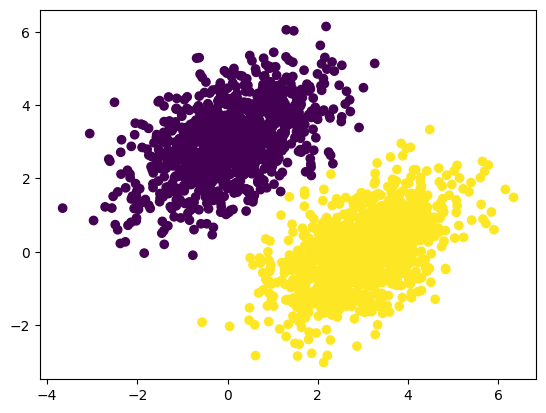

In [38]:
import matplotlib.pyplot as plt

# Get predictions from the model
predictions = model(inputs)

# Create a scatter plot
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

# Show the plot
plt.show()

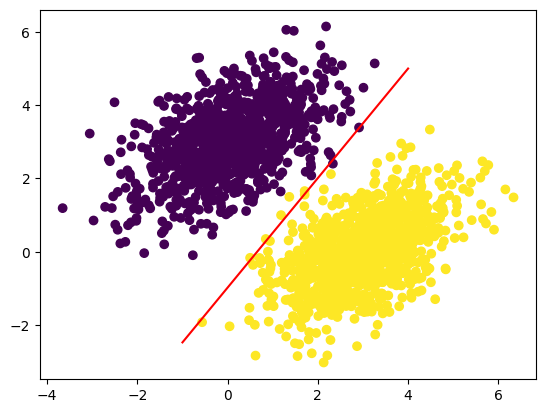

In [39]:
# Define x values for plotting the decision boundary
x = np.linspace(-1, 4, 100)

# Compute y values for the decision boundary using the formula of a linear separator
# Assuming W is a 2x1 matrix and b is a scalar for a linear model
# y = - W[0] / W[1] * x + (0.5 - b) / W[1]
y = - W[0] / W[1] * x + (0.5 - b) / W[1]

# Plot the decision boundary as a red line
plt.plot(x, y, "-r", label="Decision Boundary")

# Scatter plot of the input data points colored by predictions
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [25]:
from tensorflow import keras
import tensorflow as tf

# Define a custom Keras layer named SimpleDense
class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None): # by default, no activation function will be applied to the output of the layer which allows the user to choose activation funct

        # Call the parent class constructor - This makes sure the base class (keras.layers.Layer) is set up correctly
        super().__init__()
        # Store the number of units (neurons) for this layer
        self.units = units
        # Store the activation function if provided
        self.activation = activation

    # This method will be called once to create the layer's weights
    def build(self, input_shape):
        # Get the dimension of the input features
        input_dim = input_shape[-1]
        # Create and initialize the weight matrix W with random normal values
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        # Create and initialize the bias vector b with zeros
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    # This method defines the forward pass of the layer
    def call(self, inputs):
        # Compute the linear transformation
        y = tf.matmul(inputs, self.W) + self.b
        # Apply the activation function if one is specified
        if self.activation is not None:
            y = self.activation(y)
        # Return the output
        return y

In [40]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [27]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [41]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Create a Sequential model
model = models.Sequential([
    # Add a Dense layer with 32 units and ReLU activation function
    layers.Dense(32, activation="relu"),

    # Add another Dense layer with 32 units (default activation is linear)
    layers.Dense(32)
])

In [42]:
from tensorflow.keras import Sequential

# SimpleDense is a custom layer defined earlier
model = Sequential([
    SimpleDense(32, activation="relu"),   # First hidden layer with 32 neurons and ReLU activation
    SimpleDense(64, activation="relu"),   # Second hidden layer with 64 neurons and ReLU activation
    SimpleDense(32, activation="relu"),   # Third hidden layer with 32 neurons and ReLU activation
    SimpleDense(10, activation="softmax") # Output layer with 10 neurons and softmax activation
])


### From layers to models

### The "compile" step: Configuring the learning process

In [43]:
# Defining a Sequential model in Keras
model = keras.Sequential([
    keras.layers.Dense(1)  # Adding a dense layer with 1 unit (neuron)
])

# Compiling the model with specified optimizer, loss function, and metrics
model.compile(
    optimizer="rmsprop",  # Using RMSprop optimizer
    loss="mean_squared_error",  # Mean squared error loss function
    metrics=["accuracy"]  # Evaluating model accuracy as a metric
)

*Offers more flexibility and control over the optimizer, loss
function, and metrics because they are instantiated as objects. This allows for customization of parameters and easy integration of custom functions if needed.*

In [44]:
# Importing necessary libraries
import tensorflow.keras as keras

# Defining the model and compiling it
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Using RMSprop optimizer with default parameters
    loss=keras.losses.MeanSquaredError(),  # Mean squared error loss function
    metrics=[keras.metrics.BinaryAccuracy()]  # Binary accuracy metric for evaluation
)

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [50]:
history = model.fit(
    inputs,          # Training data (inputs)
    targets,         # Training targets (desired outputs)
    epochs=5,        # Number of epochs (iterations over the entire dataset)
    batch_size=128  # Number of samples per gradient update - During each epoch, the model updates its weights after processing a batch of 128 samples
)

Epoch 1/5
16/16 [==============================] - 0s 4ms/step - loss: 13.2872 - binary_accuracy: 0.5115
Epoch 2/5
16/16 [==============================] - 0s 4ms/step - loss: 12.8024 - binary_accuracy: 0.5130
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 12.3301 - binary_accuracy: 0.5130
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 11.8604 - binary_accuracy: 0.5125
Epoch 5/5
16/16 [==============================] - 0s 4ms/step - loss: 11.4023 - binary_accuracy: 0.5120


In [33]:
history.history

{'loss': [13.380784034729004,
  12.807146072387695,
  12.31881046295166,
  11.85517406463623,
  11.397427558898926],
 'binary_accuracy': [0.5055000185966492,
  0.5055000185966492,
  0.5049999952316284,
  0.5065000057220459,
  0.5065000057220459]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [51]:
# Importing necessary libraries
import tensorflow.keras as keras
import numpy as np

# Defining a Sequential model in Keras
model = keras.Sequential([
    keras.layers.Dense(1)  # Adding a dense layer with 1 unit (neuron)
])

# Compiling the model with specified optimizer, loss function, and metrics
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.1),  # Using RMSprop optimizer with a learning rate of 0.1
    loss=keras.losses.MeanSquaredError(),  # Mean squared error loss function
    metrics=[keras.metrics.BinaryAccuracy()]  # Binary accuracy metric for evaluation
)

# Shuffling the dataset to ensure random distribution of samples
indices_permutation = np.random.permutation(len(inputs))  # Getting a random permutation of indices
shuffled_inputs = inputs[indices_permutation]  # Shuffling inputs according to the random permutation of indices
shuffled_targets = targets[indices_permutation]  # Shuffling targets accordingly

# Splitting the dataset into training and validation sets
num_validation_samples = int(0.3 * len(inputs))  # 30% of the data for validation
val_inputs = shuffled_inputs[:num_validation_samples]  # First 30% for validation inputs
val_targets = shuffled_targets[:num_validation_samples]  # First 30% for validation targets
training_inputs = shuffled_inputs[num_validation_samples:]  # Remaining 70% for training inputs
training_targets = shuffled_targets[num_validation_samples:]  # Remaining 70% for training targets

# Training the model
history = model.fit(
    training_inputs,  # Training data (inputs)
    training_targets,  # Training targets (desired outputs)
    epochs=5,  # Number of epochs (iterations over the entire dataset)
    batch_size=16,  # Number of samples per gradient update
    validation_data=(val_inputs, val_targets)  # Validation data for evaluating model performance
)


Epoch 1/5
88/88 [==============================] - 1s 8ms/step - loss: 0.3047 - binary_accuracy: 0.9793 - val_loss: 0.0748 - val_binary_accuracy: 0.9700
Epoch 2/5
88/88 [==============================] - 1s 7ms/step - loss: 0.0781 - binary_accuracy: 0.9550 - val_loss: 0.0767 - val_binary_accuracy: 0.9283
Epoch 3/5
88/88 [==============================] - 1s 7ms/step - loss: 0.0703 - binary_accuracy: 0.9600 - val_loss: 0.1684 - val_binary_accuracy: 0.9283
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0826 - binary_accuracy: 0.9414 - val_loss: 0.1008 - val_binary_accuracy: 0.9617
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0678 - binary_accuracy: 0.9586 - val_loss: 0.0549 - val_binary_accuracy: 0.9883


### Inference: Using a model after training

In [52]:
# Making predictions on the validation data
predictions = model.predict(
    val_inputs,  # Validation inputs on which predictions are to be made
    batch_size=128  # Batch size used for making predictions
)

# Printing the first 10 predictions
print(predictions[:10])

5/5 [==============================] - 0s 2ms/step
[[ 0.5531517 ]
 [ 0.6724851 ]
 [-0.338161  ]
 [-0.16451836]
 [ 0.03017277]
 [ 0.21310377]
 [-0.38256603]
 [ 1.0285976 ]
 [ 1.0909903 ]
 [-0.31987053]]


## Summary